In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import cmasher

data = pickle.load(open('unsupervised_UMAP_winnie_data.pickle', 'rb'))

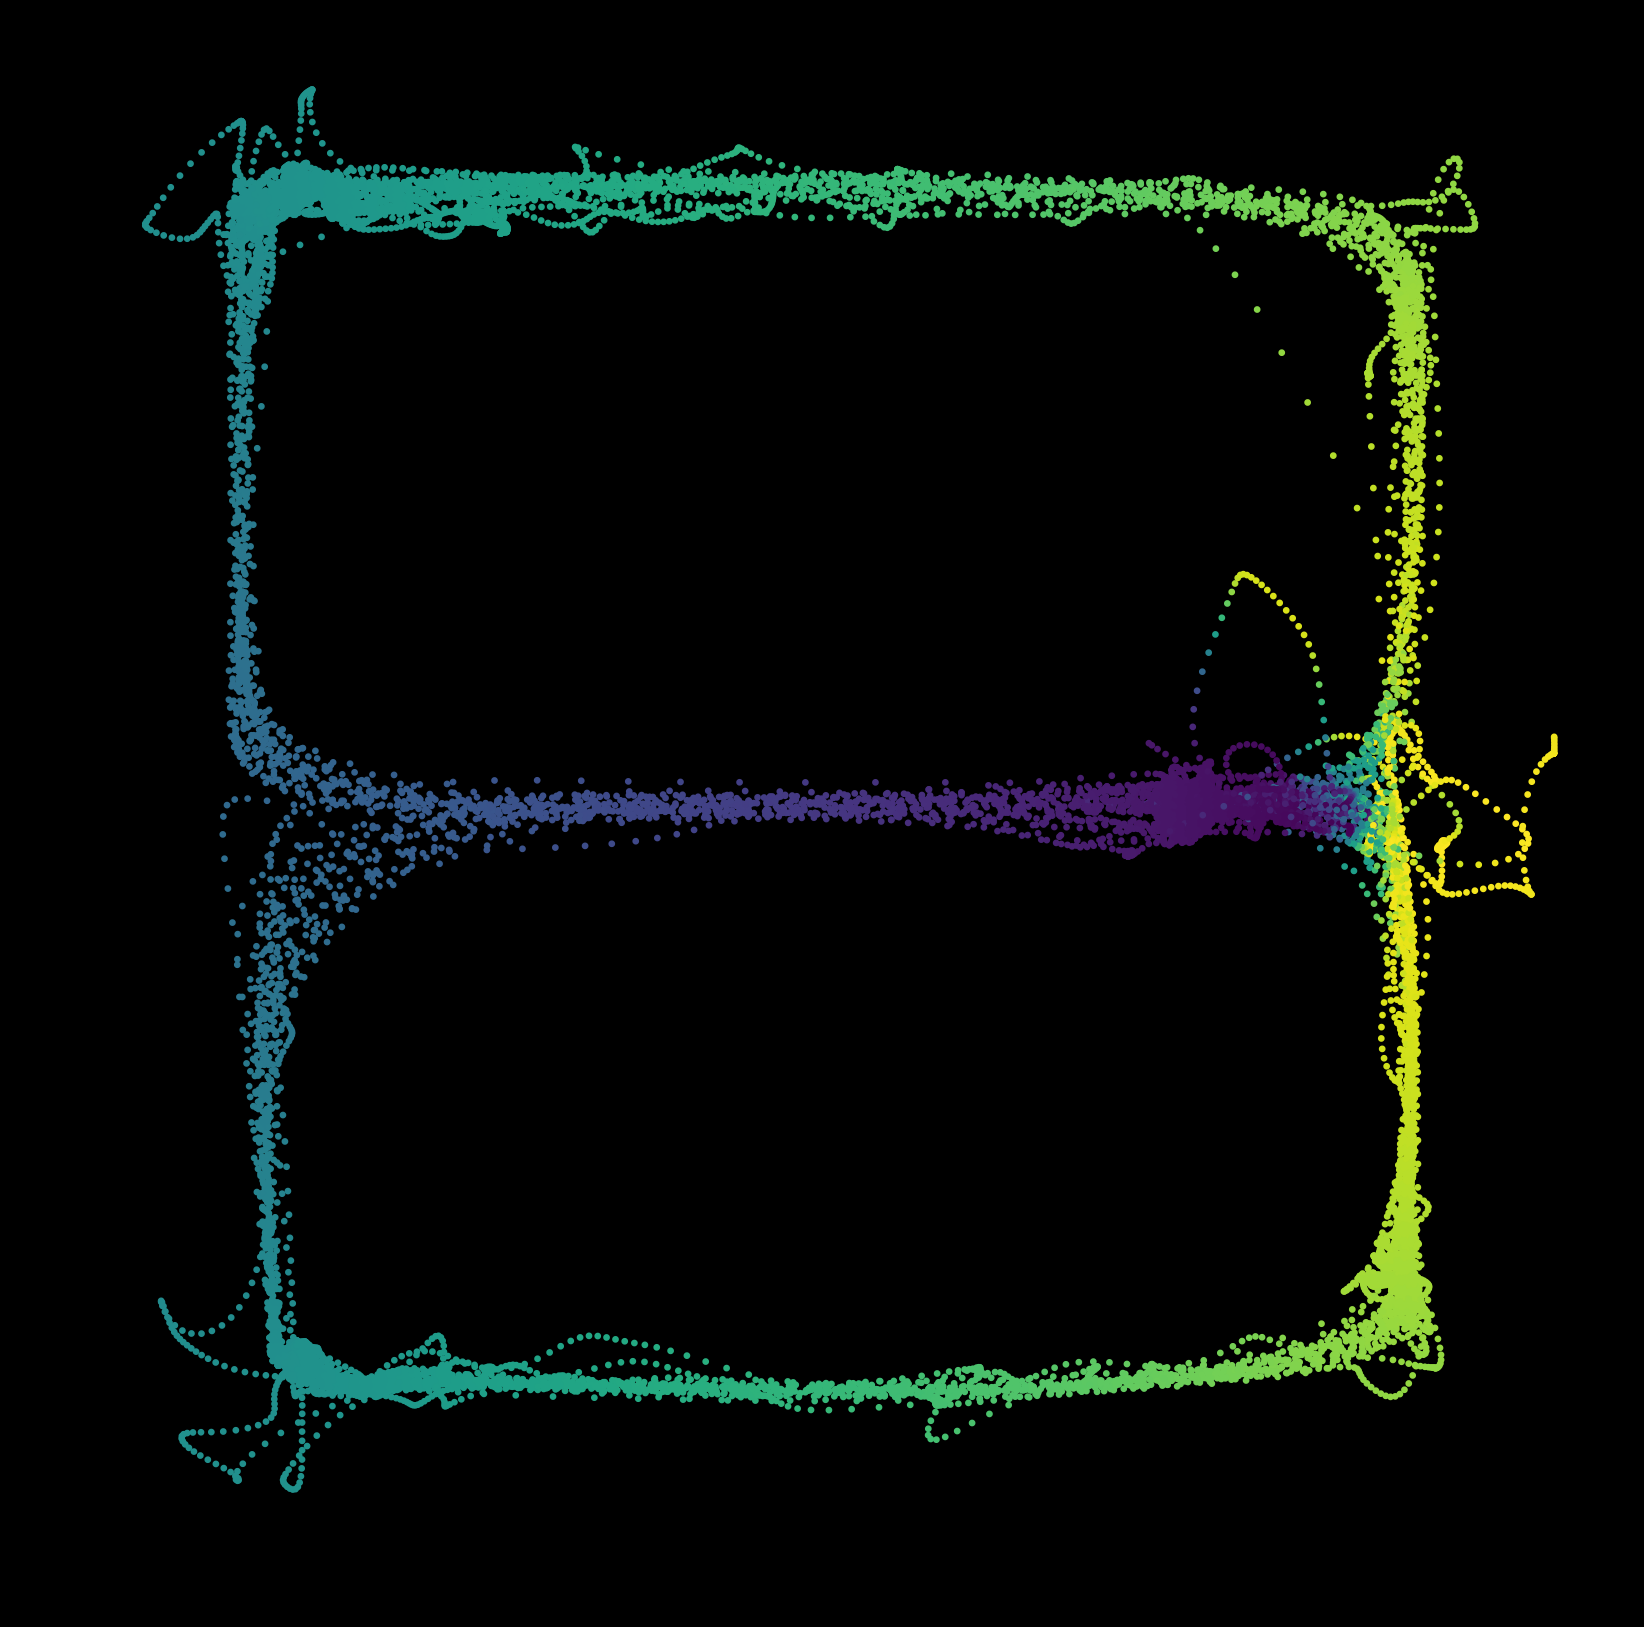

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=200)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

ax.scatter(data['pos_x'], data['pos_y'], c=data['lin_pos_sm'], s=2, cmap='viridis', rasterized=True)
fig.savefig('maze_manifold_scatter.svg')

  0%|          | 0/360 [00:00<?, ?it/s]

KeyboardInterrupt: 

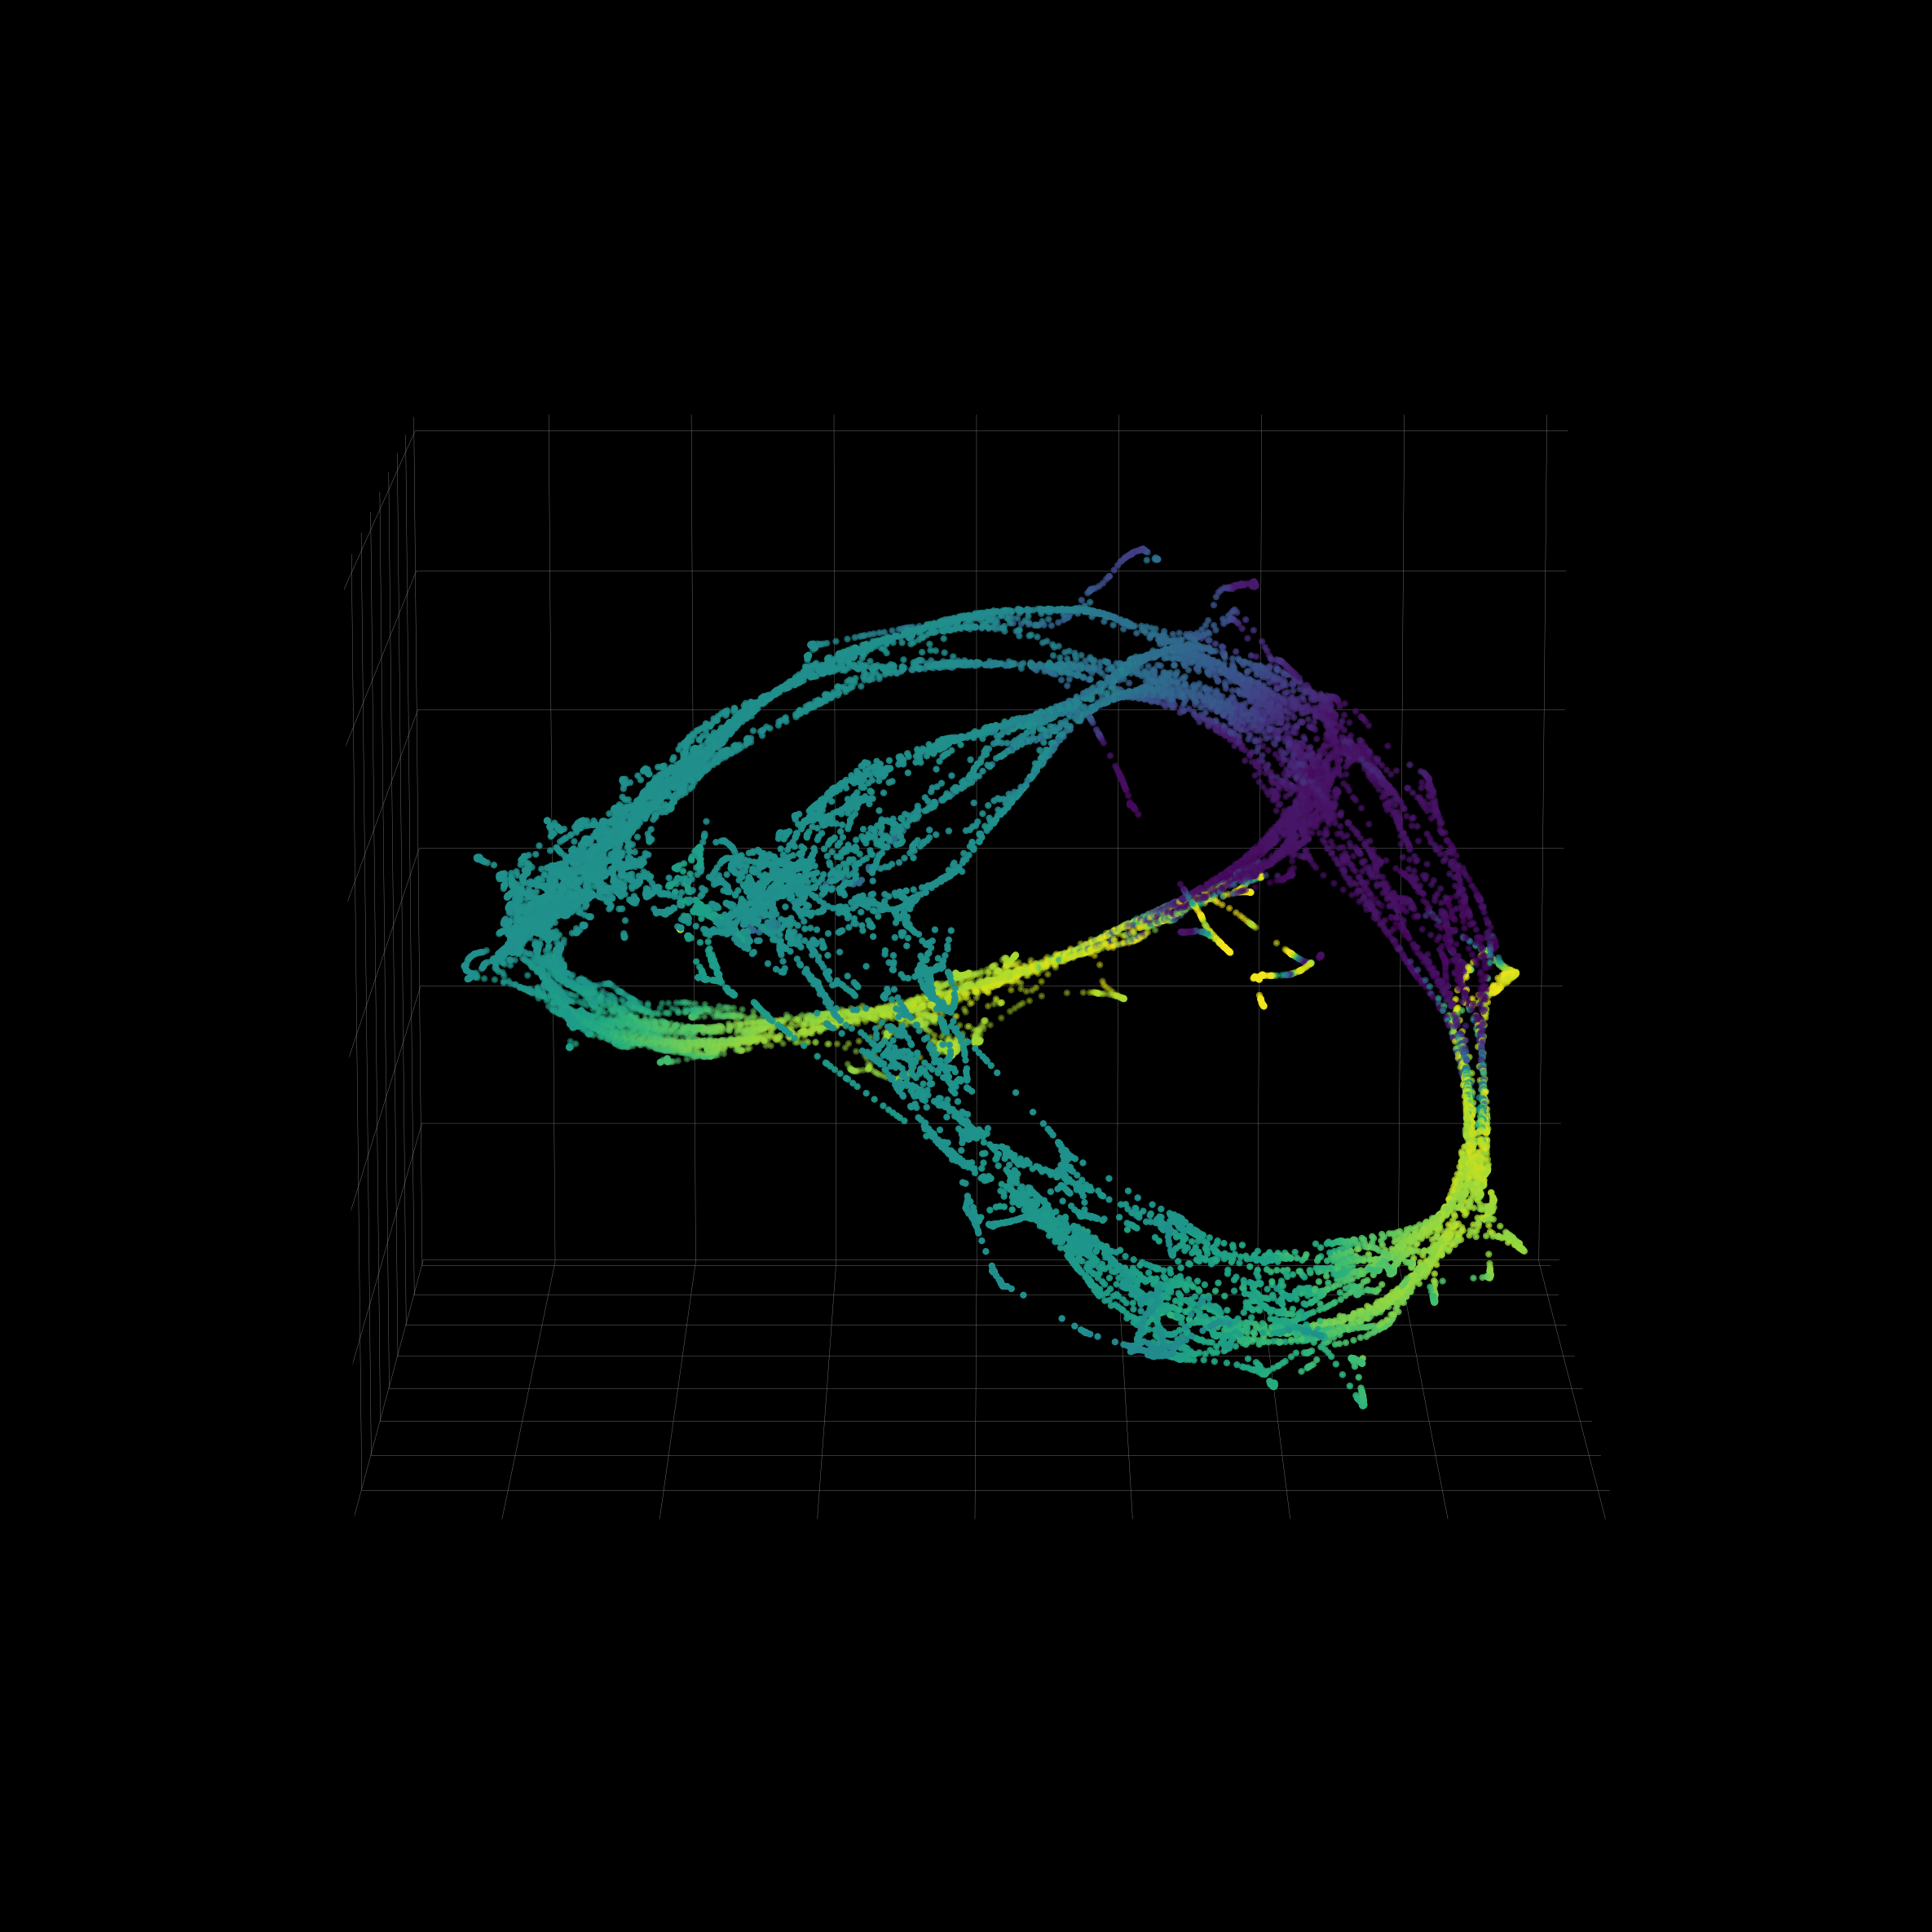

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10, 10), dpi=300, subplot_kw={'projection': '3d'})
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
# Remove gray panes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make panes transparent
ax.xaxis.pane.set_alpha(0)
ax.yaxis.pane.set_alpha(0)
ax.zaxis.pane.set_alpha(0)

# Adjust grid line width
# Customize grid lines
ax.xaxis._axinfo["grid"].update({"linewidth": 0.1, "color": "grey"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.1, "color": "grey"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.1, "color": "grey"})

ax.scatter(manifold[:, 0], manifold[:, 1], manifold[:, 2], c=data['lin_pos_sm'], cmap='viridis', s=1)

# Animate camera spin
def update(prop):
    ax.view_init(elev=10, azim=prop)

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, update, frames=tqdm(np.arange(0, 360, 1)), interval=30)
anim.save('animations/position_manifold_spinning.mp4', dpi=300)

